# Model and datafitting functions

### Mean-field models 

In [100]:
# Mean-field model with no segregation
def mf_noseg(T, alpha, ONEoverN, ba_init, bi_init, pv, omega):

    # Network size
    N=1./ONEoverN

    # Initial conditions
    pBI0, pBA0, pFI0, pFA0, pS0 = N*bi_init, N*ba_init, 0.0, 0.0, N - ba_init - N*bi_init
    
    ba = []
    fa = []
    for i in T:

        ba.append(pBA0)
        fa.append(pFA0)
        
        f = pBA0/N
        pBI1 = alpha * f * pS0 + omega * pBA0 + (1. - pv) * (1. - f) * pBI0
        pBA1 = (1. - pv) * f  * pBI0 + (1. - omega) * (1. - pv) * pBA0
        pFI1 = (1-alpha) * f * pS0 + omega * pFA0 + pv * (pBI0 + (1. - omega) * pBA0) + (1 - f) * pFI0
        pFA1 = f * pFI0 + (1. - omega) * pFA0
        pS1 = (1. - f) * pS0

        #update
        pBI0, pBA0, pFI0, pFA0, pS0 = pBI1, pBA1, pFI1, pFA1, pS1

        if float(pBI0)<=0.0000000001:
            pBI0=0.0
        if float(pBA0)<=0.0000000001:
            pBA0=0.0
        if float(pFI0)<=0.0000000001:
            pFI0=0.0
        if float(pFA0)<=0.0000000001:
            pFA0=0.0
        if float(pS0)<=0.0000000001:
            pS0=0.0

    return np.cumsum(np.asarray(ba)), np.cumsum(np.asarray(fa))

# To return only one of the types (needed for fitting only against one type)
def mf_noseg_BA(T, alpha, ONEoverN, ba_init, bi_init, pv, omega):
    return mf_noseg(T, alpha, ONEoverN, ba_init, bi_init, pv, omega)[0]

def mf_noseg_FA(T, alpha, ONEoverN, ba_init, bi_init, pv, omega):
    return mf_noseg(T, alpha, ONEoverN, ba_init, bi_init, pv, omega)[1]



# Mean-field model with segregation (two clusters gullible-skeptic)
def mf_seg(T, alphag, alphas, ONEoverN, ba_init, bi_init, pvg, pvs, omega, gulsize, s):

    # Network and component sizes
    N=1./ONEoverN
    N_gullible=N*gulsize
    N_skeptic=N-N_gullible


    # Initial conditions
    # Gullible
    pBI0g, pBA0g, pFI0g, pFA0g, pS0g = N_gullible*bi_init, N_gullible*ba_init, 0.0, 0.0, N_gullible*(1.- (ba_init+bi_init))
    # Skeptical
    pBI0s, pBA0s, pFI0s, pFA0s, pS0s = N_skeptic*bi_init, N_skeptic*ba_init, 0.0, 0.0, N_skeptic*(1.- (ba_init+bi_init))

    ba=[]
    fa=[]
    
    for i in T:

        # record
        ba.append(pBA0g+pBA0s)
        fa.append(pFA0g+pFA0s)

        # update
        fg  = s*pBA0g/N_gullible+(1-s)*pBA0s/N_skeptic
        fs = s*pBA0s/N_skeptic+(1-s)*pBA0g/N_gullible
        
        pBI1g = alphag * fg * pS0g + omega * pBA0g + (1. - pvg) * (1. - fg) * pBI0g
        pBA1g = (1. - pvg) * fg * pBI0g + (1. - omega) * (1. - pvg) * pBA0g
        pFI1g = (1-alphag) * fg * pS0g + omega * pFA0g + pvg * (pBI0g + (1. - omega) * pBA0g) + (1 - fg) * pFI0g
        pFA1g = fg * pFI0g + (1. - omega) * pFA0g
        pS1g = (1. - fg) * pS0g
        
        pBI1s = alphas * fs * pS0s + omega * pBA0s + (1. - pvs) * (1. - fs) * pBI0s
        pBA1s = (1. - pvs) * fs * pBI0s + (1. - omega) * (1. - pvs) * pBA0s
        pFI1s = (1-alphas) * fs * pS0s + omega * pFA0s + pvs * (pBI0s + (1. - omega) * pBA0s) + (1 - fs) * pFI0s
        pFA1s = fs * pFI0s + (1. - omega) * pFA0s
        pS1s = (1. - fs) * pS0s
        
        pBI0g, pBA0g, pFI0g, pFA0g, pS0g = pBI1g, pBA1g, pFI1g, pFA1g, pS1g
        pBI0s, pBA0s, pFI0s, pFA0s, pS0s = pBI1s, pBA1s, pFI1s, pFA1s, pS1s

        if float(pBI0s)<=0.0000000001:
            pBI0s=0.0
        if float(pBA0s)<=0.0000000001:
            pBA0s=0.0
        if float(pFI0s)<=0.0000000001:
            pFI0s=0.0
        if float(pFA0s)<=0.0000000001:
            pFA0s=0.0
        if float(pS0s)<=0.0000000001:
            pS0s=0.0
        if float(pBI0g)<=0.0000000001:
            pBI0g=0.0
        if float(pBA0g)<=0.0000000001:
            pBA0g=0.0
        if float(pFI0g)<=0.0000000001:
            pFI0g=0.0
        if float(pFA0g)<=0.0000000001:
            pFA0g=0.0
        if float(pS0g)<=0.0000000001:
            pS0g=0.0

    return np.cumsum(np.asarray(ba)), np.cumsum(np.asarray(fa))

# To return only one of the types (needed for fitting only against one type)
def mf_seg_BA(T, alphag, alphas, ONEoverN, ba_init, bi_init, pvg, pvs, omega, gulsize, s):
    return mf_seg(T, alphag, alphas, ONEoverN, ba_init, bi_init, pvg, pvs, omega, gulsize, s)[0]

def mf_seg_FA(T, alphag, alphas, ONEoverN, ba_init, bi_init, pvg, pvs, omega, gulsize, s):
    return mf_seg(T, alphag, alphas, ONEoverN, ba_init, bi_init, pvg, pvs, omega, gulsize, s)

### Fit functions

In [101]:
def fit_mf_noseg(T_double, alpha, ONEoverN, ba_init, bi_init, pv, omega):
    T = T_double[:len(T_double)/2]
    BA, FA = mf_noseg(T, alpha, ONEoverN, ba_init, bi_init, pv, omega)
    return np.append(BA, FA)

def fit_mf_seg(T_double, alphag, alphas, ONEoverN, ba_init, bi_init, pvg, pvs, omega, gulsize, s):
    T = T_double[:len(T_double)/2]
    BA, FA = mf_seg(T, alphag, alphas, ONEoverN, ba_init, bi_init, pvg, pvs, omega, gulsize, s)
    return np.append(BA, FA)

## Example

In [3]:
# import packages
import numpy as np
import matplotlib.pyplot as pp
import pylab
import scipy
import pandas as pd
from scipy.optimize import curve_fit

%matplotlib inline

# Import data
hoax_data = pd.read_csv('hoaxy_mexico-border-trump-elected_cum.csv',parse_dates=True)
for_users = hoax_data['For']
against_users = hoax_data['Against']
t_empirical=np.arange(0,len(hoax_data))
len_data= len(hoax_data)

# clean the data a bit - take only the n+1 days
n=15
t_empirical_month1 = t_empirical[0:n]
for_users_month1 = for_users[0:n]
against_users_month1 = against_users[0:n]

In [4]:
param0 =0.5,0.0001,0.1,0.1,0.5,0.5
param_bounds =([0., 0., 0, 0., 0., 0.], [1., 1., 1., 1., 1., 1.])

# Curve fit
T_double = np.append(t_empirical_month1, t_empirical_month1)
data_double = np.append(for_users_month1, against_users_month1)
popt, cov = curve_fit(fit_mf_noseg, T_double, data_double, p0=param0,bounds=param_bounds, max_nfev=100000)

alpha = 1e-06
network size = 5021316.0
initial BA = 0.0002
initial BI = 0.576
pv = 0.051
tau = 1.0


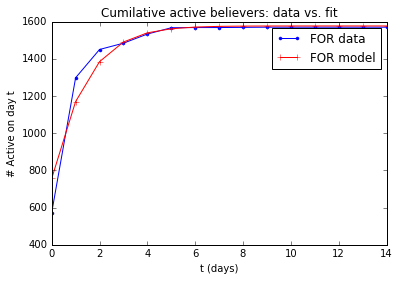

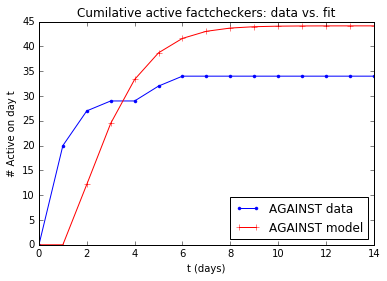

In [5]:
# Parameters
print('alpha = '+ str(round(popt[0], 6)))
print('network size = ' + str(round(1./popt[1])))
print('initial BA = ' + str(round(popt[2], 4)))
print('initial BI = ' + str(round(popt[3], 4)))
print('pv = ' + str(round(popt[4], 4)))
print('tau = ' + str(round(1./popt[5], 4)))

# Plot
BA, FA = mf_noseg(t_empirical_month1,*popt)
pp.figure()
pp.plot(t_empirical_month1, for_users_month1, 'b.-',t_empirical_month1, 
        BA,'r+-')
pp.xlabel("t (days)")
pp.ylabel("# Active on day t")
pp.title("Cumilative active believers: data vs. fit")
pp.legend(['FOR data', 'FOR model'],loc=0)
pp.savefig('fitFORAGAINST2_for.pdf')
pp.show()
pp.figure()
pp.plot(t_empirical_month1, against_users_month1, 'b.-',t_empirical_month1, 
        FA,'r+-')
pp.xlabel("t (days)")
pp.ylabel("# Active on day t")
pp.title("Cumilative active factcheckers: data vs. fit")
pp.legend(['AGAINST data', 'AGAINST model' ],loc=0)
pp.savefig('fitFORAGAINST2_for.pdf')
pp.show()

Try with hourly binned data

In [29]:
# Import data
hoax_data_hour = pd.read_csv('hoaxy_mexico-border-trump-elected_cum_hour.csv',parse_dates=True)
for_users_hour = hoax_data_hour['For']
against_users_hour = hoax_data_hour['Against']
t_empirical_hour=np.arange(0,len(hoax_data_hour))
len_data_hour= len(hoax_data_hour)

# clean the data a bit - take only the n+1 days
n=7*24
t_empirical_month1_hour = t_empirical_hour[0:n]
for_users_month1_hour = for_users_hour[0:n]
against_users_month1_hour = against_users_hour[0:n]

Compare the two resolutions

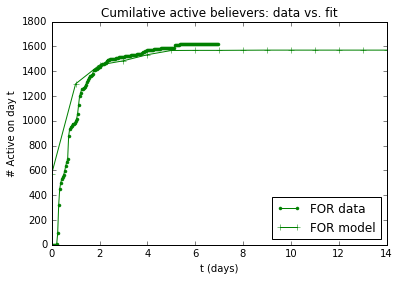

In [30]:
pp.figure()
pp.plot(t_empirical_month1_hour/24.0, for_users_month1_hour, 'g.-',t_empirical_month1, 
        for_users_month1,'g+-')
pp.xlabel("t (days)")
pp.ylabel("# Active on day t")
pp.title("Cumilative active believers: data vs. fit")
pp.legend(['FOR data', 'FOR model'],loc=0)
pp.savefig('fitFORAGAINST2_for.pdf')
pp.show()

### Datafit to For

In [84]:
param0 =0.5,0.0001,0.001,0.001,0.5,0.5
param_bounds =([0., 0., 0., 0., 0., 0.], [1., 1., 1., 1., 1., 1.])

# Curve fit
popt, cov = curve_fit(mf_noseg_BA, t_empirical_month1_hour, for_users_month1_hour, p0=param0,bounds=param_bounds, max_nfev=100000)

alpha = 3e-06
network size = 99.0
initial BA = 0.0418
initial BI = 1.0
pv = 0.0512
tau = 6.43967128876e+33


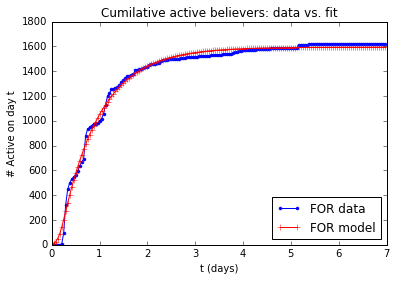

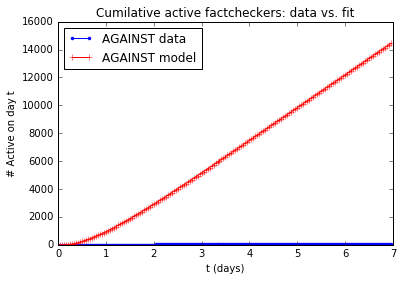

In [85]:
# Parameters
print('alpha = '+ str(round(popt[0], 6)))
print('network size = ' + str(round(1./popt[1])))
print('initial BA = ' + str(round(popt[2], 4)))
print('initial BI = ' + str(round(popt[3], 4)))
print('pv = ' + str(round(popt[4], 4)))
print('tau = ' + str(round(1./popt[5], 4)))

BA, FA = mf_noseg(t_empirical_month1_hour,*popt)
pp.figure()
pp.plot(t_empirical_month1_hour/24., for_users_month1_hour, 'b.-',t_empirical_month1_hour/24., 
        BA,'r+-')
pp.xlabel("t (days)")
pp.ylabel("# Active on day t")
pp.title("Cumilative active believers: data vs. fit")
pp.legend(['FOR data', 'FOR model'],loc=0)
pp.show()
pp.figure()
pp.plot(t_empirical_month1_hour/24., against_users_month1_hour, 'b.-',t_empirical_month1_hour/24., 
        FA,'r+-')
pp.xlabel("t (days)")
pp.ylabel("# Active on day t")
pp.title("Cumilative active factcheckers: data vs. fit")
pp.legend(['AGAINST data', 'AGAINST model' ],loc=0)
pp.show()

### Datafit to Against

In [88]:
param0 =0.5,0.0001,0.001,0.001,0.5,0.5
param_bounds =([0., 0., 0., 0., 0., 0.], [1., 1., 1., 1., 1., 1.])

# Curve fit
popt, cov = curve_fit(mf_noseg_FA, t_empirical_month1_hour, against_users_month1_hour, p0=param0,bounds=param_bounds, max_nfev=100000)

alpha = 1.0
network size = 2.0
initial BA = 0.0891
initial BI = 0.0
pv = 0.0978
tau = 14.6151


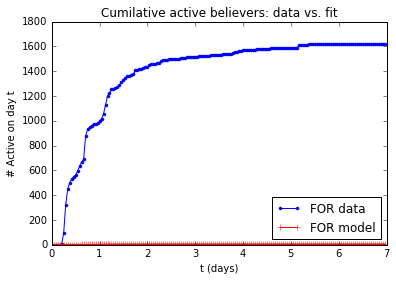

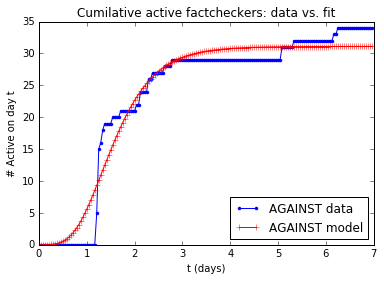

In [89]:
# Parameters
print('alpha = '+ str(round(popt[0], 6)))
print('network size = ' + str(round(1./popt[1])))
print('initial BA = ' + str(round(popt[2], 4)))
print('initial BI = ' + str(round(popt[3], 4)))
print('pv = ' + str(round(popt[4], 4)))
print('tau = ' + str(round(1./popt[5], 4)))

BA, FA = mf_noseg(t_empirical_month1_hour,*popt)
pp.figure()
pp.plot(t_empirical_month1_hour/24., for_users_month1_hour, 'b.-',t_empirical_month1_hour/24., 
        BA,'r+-')
pp.xlabel("t (days)")
pp.ylabel("# Active on day t")
pp.title("Cumilative active believers: data vs. fit")
pp.legend(['FOR data', 'FOR model'],loc=0)
pp.show()
pp.figure()
pp.plot(t_empirical_month1_hour/24., against_users_month1_hour, 'b.-',t_empirical_month1_hour/24., 
        FA,'r+-')
pp.xlabel("t (days)")
pp.ylabel("# Active on day t")
pp.title("Cumilative active factcheckers: data vs. fit")
pp.legend(['AGAINST data', 'AGAINST model' ],loc=0)
pp.show()

### Both

In [90]:
param0 =0.5,0.0001,0.001,0.001,0.5,0.5
param_bounds =([0., 0., 0, 0., 0., 0.], [1., 1., 1., 1., 1., 1.])

# Curve fit
T_double = np.append(t_empirical_month1_hour, t_empirical_month1_hour)
data_double = np.append(for_users_month1_hour, against_users_month1_hour)
popt, cov = curve_fit(fit_mf_noseg, T_double, data_double, p0=param0,bounds=param_bounds, max_nfev=100000)

alpha = 0.013362
network size = 3699321.0
initial BA = 0.0
initial BI = 0.927
pv = 0.0011
tau = 1.068


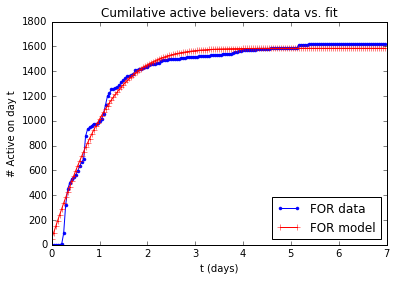

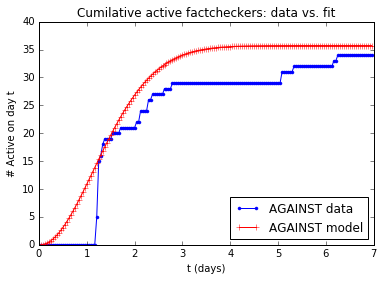

In [95]:
# Parameters
print('alpha = '+ str(round(popt[0], 6)))
print('network size = ' + str(round(1./popt[1])))
print('initial BA = ' + str(round(popt[2], 4)))
print('initial BI = ' + str(round(popt[3], 4)))
print('pv = ' + str(round(popt[4], 4)))
print('tau = ' + str(round(1./popt[5], 4)))

# Plot
BA, FA = mf_noseg(t_empirical_month1_hour,*popt)
pp.figure()
pp.plot(t_empirical_month1_hour/24., for_users_month1_hour, 'b.-',t_empirical_month1_hour/24., 
        BA,'r+-')
pp.xlabel("t (days)")
pp.ylabel("# Active on day t")
pp.title("Cumilative active believers: data vs. fit")
pp.legend(['FOR data', 'FOR model'],loc=0)
pp.savefig('BA_hour.pdf')
pp.show()
pp.figure()
pp.plot(t_empirical_month1_hour/24., against_users_month1_hour, 'b.-',t_empirical_month1_hour/24., 
        FA,'r+-')
pp.xlabel("t (days)")
pp.ylabel("# Active on day t")
pp.title("Cumilative active factcheckers: data vs. fit")
pp.legend(['AGAINST data', 'AGAINST model' ],loc=0)
pp.savefig('FA_hour.pdf')
pp.show()

### Segregated

In [102]:
# Initial parameter estimated
# param0 = alphag, alphas, ONEoverN, ba_init, bi_init, pvg, pvs, omega, gulsize, s):
param0 =0.5,0.5,0.0001,0.001,0.001,0.5,0.5, 0.5, 0.5, 0.5
param_bounds =([0., 0., 0, 0., 0., 0., 0., 0., 0., 0.], [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Curve fit
T_double = np.append(t_empirical_month1_hour, t_empirical_month1_hour)
data_double = np.append(for_users_month1_hour, against_users_month1_hour)
popt, cov = curve_fit(fit_mf_seg, T_double, data_double, p0=param0,bounds=param_bounds, max_nfev=100000)

alphag = 0.240604
alphas = 0.148473
network size = 138.0
initial BA = 0.0557
initial BI = 1.0
pvg = 0.0
pvs = 0.17213772
tau = 3.5908
gullsize = 0.9886
s = 0.2319


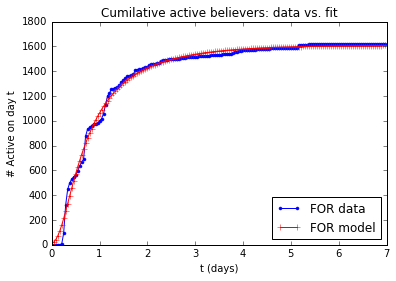

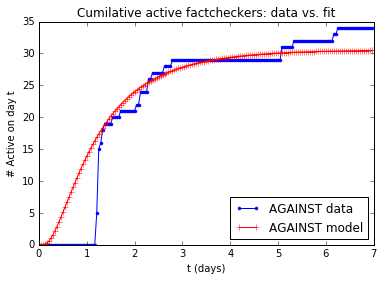

In [105]:
# Parameters
print('alphag = '+ str(round(popt[0], 6)))
print('alphas = '+ str(round(popt[1], 6)))
print('network size = ' + str(round(1./popt[2])))
print('initial BA = ' + str(round(popt[3], 4)))
print('initial BI = ' + str(round(popt[4], 4)))
print('pvg = ' + str(round(popt[5], 8)))
print('pvs = ' + str(round(popt[6], 8)))
print('tau = ' + str(round(1./popt[7], 4)))
print('gullsize = ' + str(round(popt[8], 4)))
print('s = ' + str(round(popt[9], 4)))

# Plot
BA, FA = mf_seg(t_empirical_month1_hour,*popt)
pp.figure()
pp.plot(t_empirical_month1_hour/24., for_users_month1_hour, 'b.-',t_empirical_month1_hour/24., 
        BA,'r+-')
pp.xlabel("t (days)")
pp.ylabel("# Active on day t")
pp.title("Cumilative active believers: data vs. fit")
pp.legend(['FOR data', 'FOR model'],loc=0)
pp.savefig('BA_hour.pdf')
pp.show()
pp.figure()
pp.plot(t_empirical_month1_hour/24., against_users_month1_hour, 'b.-',t_empirical_month1_hour/24., 
        FA,'r+-')
pp.xlabel("t (days)")
pp.ylabel("# Active on day t")
pp.title("Cumilative active factcheckers: data vs. fit")
pp.legend(['AGAINST data', 'AGAINST model' ],loc=0)
pp.savefig('FA_hour.pdf')
pp.show()